AlphaMissense Prediction with Laboratory Data Comparison

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
# Replace with the data you want by using the local file path
df = pd.read_csv("data/PSEN1_Sun.csv")

# Quick look at dataset headers (columns)
print(df.columns.tolist())

['Variants', 'Mutation', 'AAO', 'Total Activity', 'SD of Total Activity', 'Ab42/Ab40 ratio', 'SD of ratio', 'Amount of Ab40', 'SD of Ab40', 'Amount of Ab42', 'SD of Ab42', 'variant_id_hg38', 'variant_id_hg19', 'aaref', 'aaalt', 'SIFT_score', 'SIFT_converted_rankscore', 'SIFT_pred', 'SIFT4G_score', 'SIFT4G_converted_rankscore', 'SIFT4G_pred', 'Polyphen2_HDIV_score', 'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_pred', 'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore', 'Polyphen2_HVAR_pred', 'MutationTaster_score', 'MutationTaster_rankscore', 'MutationTaster_pred', 'MutationTaster_model', 'MutationTaster_trees_benign', 'MutationTaster_trees_deleterious', 'MutationAssessor_score', 'MutationAssessor_rankscore', 'MutationAssessor_pred', 'PROVEAN_score', 'PROVEAN_converted_rankscore', 'PROVEAN_pred', 'VEST4_score', 'VEST4_rankscore', 'MetaSVM_score', 'MetaSVM_rankscore', 'MetaSVM_pred', 'MetaLR_score', 'MetaLR_rankscore', 'MetaLR_pred', 'Reliability_index', 'MetaRNN_score', 'MetaRNN_rankscore

In [3]:
# Example: assuming columns 'AM_score' and 'Abeta42_40_ratio'
x_col = "AAO" # one of the columns; change to what you want for x-axis
y_col = "AlphaMissense_score" # one of the columns; change to what you want for y-axis

# Customize axis labels (titles for X and Y axis)
x_axis_label = "Age of Onset" # change as needed
y_axis_label = "AM Score" # change as needed

In [4]:
# Select only rows where both columns have numeric values
data = df[[x_col, y_col]].dropna()

# Convert to numeric (in case they're strings)
data[x_col] = pd.to_numeric(data[x_col], errors="coerce")
data[y_col] = pd.to_numeric(data[y_col], errors="coerce")

# Drop any rows that became NaN after conversion
data = data.dropna()

In [5]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data[x_col], data[y_col])

print(f"Regression line: y = {slope:.3f}x + {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.5f}")


Regression line: y = -0.013x + 1.397
R-squared: 0.178
P-value: 0.00000


Text(0, 0.5, 'AM Score')

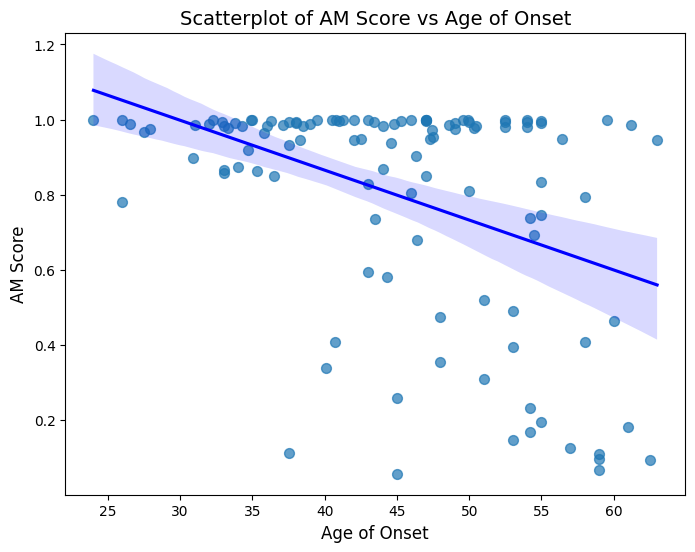

In [6]:
# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=data, x=x_col, y=y_col, ci=95, scatter_kws={"s":50, "alpha":0.7}, line_kws={"color":"blue"})

plt.title(f"Scatterplot of {y_axis_label} vs {x_axis_label}", fontsize=14)
plt.xlabel(x_axis_label, fontsize=12)
plt.ylabel(y_axis_label, fontsize=12)

In [8]:
# Save plot locally
# plt.savefig(f"scatterplot_regression_{x_col}_{y_col}.png", dpi=300)
# plt.show()